# Load libraries and import datasets

In [16]:
# Import the pandas library as pd for data manipulation
import pandas as pd

# Import the numpy library as np for numerical operations
import numpy as np

# Import the seaborn library as sns for statistical data visualization
import seaborn as sns

# Import the matplotlib.pyplot module as plt for plotting graphs and visualizations
import matplotlib.pyplot as plt

In [17]:
#Read the CSV files into pandas DataFrames
students_math=pd.read_csv('student-mat.csv', sep=';')
students_port=pd.read_csv('student-por.csv', sep=';')

print(students_math.head())
print(students_port.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     G

In [18]:
#Check the structure and summary of the datasets before merging them together
print(students_math.info())
print(students_port.info())
print(students_math.describe())
print(students_port.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Note found on readme for data sets:
> _Additional note:_ there are several (382) students that belong to both datasets .
These students can be identified by searching for identical attributes
that characterize each student

In [19]:
#Merge datasets on attribute "invariant" columns to only keep the same students present in both datasets
student_merged=pd.merge(students_math, students_port, how='inner', on=['school', 'sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet'])

print(student_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        382 non-null    object
 1   sex           382 non-null    object
 2   age           382 non-null    int64 
 3   address       382 non-null    object
 4   famsize       382 non-null    object
 5   Pstatus       382 non-null    object
 6   Medu          382 non-null    int64 
 7   Fedu          382 non-null    int64 
 8   Mjob          382 non-null    object
 9   Fjob          382 non-null    object
 10  reason        382 non-null    object
 11  guardian_x    382 non-null    object
 12  traveltime_x  382 non-null    int64 
 13  studytime_x   382 non-null    int64 
 14  failures_x    382 non-null    int64 
 15  schoolsup_x   382 non-null    object
 16  famsup_x      382 non-null    object
 17  paid_x        382 non-null    object
 18  activities_x  382 non-null    object
 19  nursery 

In [20]:
student_merged.to_csv('student_merged.csv', index=False)

Range of each numeric variable:
 age              7
Medu             4
Fedu             4
traveltime_x     3
studytime_x      3
failures_x       3
famrel_x         4
freetime_x       4
goout_x          4
Dalc_x           4
Walc_x           4
health_x         4
absences_x      75
G1_x            16
G2_x            19
G3_x            20
traveltime_y     3
studytime_y      3
failures_y       3
famrel_y         4
freetime_y       4
goout_y          4
Dalc_y           4
Walc_y           4
health_y         4
absences_y      32
G1_y            19
G2_y            14
G3_y            19
dtype: int64

Variance of each numeric variable:
 age              1.377032
Medu             1.180223
Fedu             1.201742
traveltime_x     0.483551
studytime_x      0.715374
failures_x       0.532142
famrel_x         0.849384
freetime_x       0.976605
goout_x          1.281259
Dalc_x           0.785402
Walc_x           1.645745
health_x         1.961008
absences_x      58.144453
G1_x            11.216920
G2

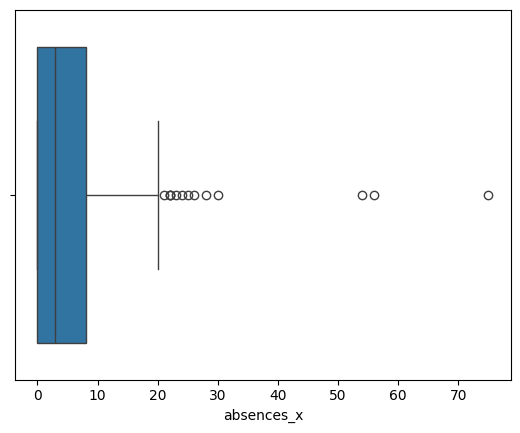

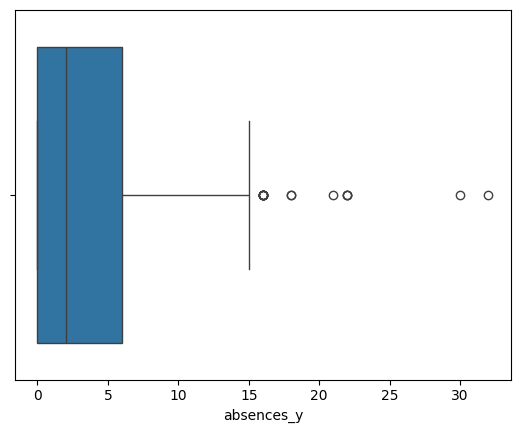

In [21]:
#Find outliers for numeric values
numeric_cols = student_merged.select_dtypes(include=['int64', 'float64']).columns
# Calculate the range (maximum - minimum) for each numeric variable
range_values = student_merged[numeric_cols].max() - student_merged[numeric_cols].min()
print("Range of each numeric variable:\n", range_values)
# Calculate the variance for each numeric variable
variance_values = student_merged[numeric_cols].var()
print("\nVariance of each numeric variable:\n", variance_values)

plt.figure(); sns.boxplot(x=student_merged['absences_x']); plt.show()
plt.figure(); sns.boxplot(x=student_merged['absences_y']); plt.show()

# Cap values of 'absences_x' and 'absences_y' at their 95th percentile to reduce the effect of outliers
cap_value_x = student_merged['absences_x'].quantile(0.95)
cap_value_y = student_merged['absences_y'].quantile(0.95)

student_merged['absences_x'] = student_merged['absences_x'].clip(upper=cap_value_x)
student_merged['absences_y'] = student_merged['absences_y'].clip(upper=cap_value_y)

In [22]:
#Check for inconsistencies in responses from the same students in both datasets

#Check for inconsistencies in 'guardian' (Guardian)
is_guardian_same = (student_merged['guardian_x'] == student_merged['guardian_y']).all()
print(f"Are 'guardian_x' and 'guardian_y' (guardian) identical in all rows?  {is_guardian_same}")

#Check for inconsistencies in 'Dalc' (Alcohol consumption during weekdays)
is_dalc_same = (student_merged['Dalc_x'] == student_merged['Dalc_y']).all()
print(f"Are 'Dalc_x' and 'Dalc_y' (Alcohol consumption during weekdays) identical in all rows?  {is_dalc_same}")

#Count number of rows where 'guardian' and 'Dalc' differ
guardian_diff = (student_merged['guardian_x'] != student_merged['guardian_y']).sum()
dalc_diff = (student_merged['Dalc_x'] != student_merged['Dalc_y']).sum()
print(f"Number of rows where 'guardian' is different: {guardian_diff}")
print(f"Number of rows where 'Dalc' is different: {dalc_diff}")

Are 'guardian_x' and 'guardian_y' (guardian) identical in all rows?  False
Are 'Dalc_x' and 'Dalc_y' (Alcohol consumption during weekdays) identical in all rows?  False
Number of rows where 'guardian' is different: 6
Number of rows where 'Dalc' is different: 5


## Students report different things for each survey, columns cannot be merged. Each columns will be treated separetely

# Identify at _risk students_

In [ ]:

# we have 'at_risk_math' and at_risk_port' as our target variables (G3_x and G3_y for final grades in math and portuguese respectively)
#G3 - final grade (numeric: from 0 to 20) if less than 10 - at risk of failing

# Condition: Is student_merged['G3_x'] < 10?
# If True:  set value to 1 (At Risk)
# If False: set value to 0 (Not At Risk)

student_merged['at_risk_math'] = np.where(student_merged['G3_x'] < 10, 1, 0)
student_merged['at_risk_port'] = np.where(student_merged['G3_y'] < 10, 1, 0)

# Combine 'at_risk_total' column for visualization

def set_at_risk_total(row):
    if row['at_risk_math'] == 1 and row['at_risk_port'] == 1:
        return 'At Risk (Both)'
    elif row['at_risk_math'] == 1:
        return 'At Risk (Math Only)'
    elif row['at_risk_port'] == 1:
        return 'At Risk (Port Only)'
    else:
        return 'Not At Risk'

student_merged['at_risk_total'] = student_merged.apply(set_at_risk_total, axis=1)


print("\n--- Target Variable Creation ---")
print("Breakdown of 'at_risk_math':")
print(student_merged['at_risk_math'].value_counts())

print("\nBreakdown of 'at_risk_port':")
print(student_merged['at_risk_port'].value_counts())

print("\nBreakdown of 'at_risk_total':")
print(student_merged['at_risk_total'].value_counts())


--- Target Variable Creation ---
Breakdown of 'at_risk_math':
at_risk_math
0    255
1    127
Name: count, dtype: int64

Breakdown of 'at_risk_port':
at_risk_port
0    350
1     32
Name: count, dtype: int64

Breakdown of 'at_risk_total':
at_risk_total
Not At Risk            246
At Risk (Math Only)    104
At Risk (Both)          23
At Risk (Port Only)      9
Name: count, dtype: int64


# Create cleaned dataset ready for visualization

In [ ]:
# Create cleaned dataset ready for visualization
# These are the columns  used to merge. They are the 'invariant' attributes.
invariant_features = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
    'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'
]

# These are the 'variant' attributes related to the Math class (_x)
math_features = [
    'guardian_x', 'traveltime_x', 'studytime_x', 'failures_x', 'schoolsup_x',
    'famsup_x', 'paid_x', 'activities_x', 'higher_x', 'romantic_x', 'famrel_x',
    'freetime_x', 'goout_x', 'Dalc_x', 'Walc_x', 'health_x', 'absences_x'
]

# These are the 'variant' attributes related to the Portuguese class (_y)
port_features = [
    'guardian_y', 'traveltime_y', 'studytime_y', 'failures_y', 'schoolsup_y',
    'famsup_y', 'paid_y', 'activities_y', 'higher_y', 'romantic_y', 'famrel_y',
    'freetime_y', 'goout_y', 'Dalc_y', 'Walc_y', 'health_y', 'absences_y'
]

# These are the grade and target columns
target_features = [
    'G1_x', 'G2_x', 'G3_x', 'G1_y', 'G2_y', 'G3_y',
    'at_risk_math', 'at_risk_port', 'at_risk_total'
]

print("\n--- Feature Lists Created ---")
print(f"Invariant Features ({len(invariant_features)})")
print(f"Math-Specific Features ({len(math_features)})")
print(f"Portuguese-Specific Features ({len(port_features)})")


--- Feature Lists Created ---
Invariant Features (13)
Math-Specific Features (17)
Portuguese-Specific Features (17)


In [ ]:
student_merged.to_csv('student_merged_cleaned.csv', index=False)